In [1]:
from sklearn.decomposition import PCA # PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path_Benign1 = "Updated data/BENIGN_1.csv"
Benign1_data = pd.read_csv(file_path_Benign1)
total_data = pd.read_csv(file_path_Benign1)

file_path_Benign2 = "Updated data/BENIGN_2.csv"
Benign2_data = pd.read_csv(file_path_Benign2)
total_data = pd.concat([total_data, pd.read_csv(file_path_Benign2)]) 
"""
file_path_Benign3 = "Updated data/Benign_3.csv"
Benign3_data = pd.read_csv(file_path_Benign3)
total_data = pd.concat([total_data, pd.read_csv(file_path_Benign3)])

file_path_Benign4 = "Updated data/Benign_4.csv"
Benign4_data = pd.read_csv(file_path_Benign4)
total_data = pd.concat([total_data, pd.read_csv(file_path_Benign4)])
"""
file_path_Botnet = "Updated data/BotnetARES.csv"
Botnet_data = pd.read_csv(file_path_Botnet)
total_data = pd.concat([total_data, pd.read_csv(file_path_Botnet)])

file_path_Brute = "Updated data/BruteForce.csv"
Brute_data = pd.read_csv(file_path_Brute)
total_data = pd.concat([total_data, pd.read_csv(file_path_Brute)])

file_path_Dos = "Updated data/Dos.csv"
Dos_data = pd.read_csv(file_path_Dos)
total_data = pd.concat([total_data, pd.read_csv(file_path_Dos)])

file_path_Infiltration = "Updated data/Infiltration.csv"
Infil_data = pd.read_csv(file_path_Infiltration)
total_data = pd.concat([total_data, pd.read_csv(file_path_Infiltration)])

file_path_Web = "Updated data/WebAttack.csv"
Web_data = pd.read_csv(file_path_Web)
total_data = pd.concat([total_data, pd.read_csv(file_path_Web)])

file_path_Port = "Updated data/PortScan.csv"
Port_data = pd.read_csv(file_path_Port)
total_data = pd.concat([total_data, pd.read_csv(file_path_Port)])

total_data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,56698.0,176.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,53.0,144670.0,4.0,2.0,136.0,182.0,34.0,34.0,34.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,2261.0,224.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,53.0,163.0,2.0,2.0,94.0,264.0,47.0,47.0,47.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [3]:
print("total_data", total_data.shape)
print("Benign1_data", Benign1_data.shape)
print("Benign2_data", Benign2_data.shape)
#print("Benign3_data", Benign3_data.shape)
#print("Benign4_data", Benign3_data.shape)
print("Botnet_data", Botnet_data.shape)
print("Brute_data", Brute_data.shape)
print("Dos_data", Dos_data.shape)
print("Infil_data", Infil_data.shape)
print("Web_data", Web_data.shape)
print("Port_data", Port_data.shape)

total_data (2279491, 79)
Benign1_data (1000000, 79)
Benign2_data (817082, 79)
Botnet_data (10001, 79)
Brute_data (11065, 79)
Dos_data (303800, 79)
Infil_data (500, 79)
Web_data (10000, 79)
Port_data (127043, 79)


In [4]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2279491 entries, 0 to 127042
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             float64
 1   Flow Duration                float64
 2   Total Fwd Packets            float64
 3   Total Backward Packets       float64
 4   Total Length of Fwd Packets  float64
 5   Total Length of Bwd Packets  float64
 6   Fwd Packet Length Max        float64
 7   Fwd Packet Length Min        float64
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        float64
 11  Bwd Packet Length Min        float64
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 float64
 19  F

In [5]:
total_data.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.279491e+06,2.279491e+06,2.279491e+06,2.279491e+06,2.279491e+06,2.279491e+06,2.279491e+06,2.279491e+06,2.279491e+06,2.279491e+06,...,2.279491e+06,2.279491e+06,2.279491e+06,2.279491e+06,2.279491e+06,2.279491e+06,2.279491e+06,2.279491e+06,2.279491e+06,2.279491e+06
mean,8.089831e+03,1.341904e+07,7.129423e+02,7.140187e+02,1.330651e+03,1.642933e+04,8.697495e+02,7.200687e+02,7.490878e+02,7.557862e+02,...,5.720887e+00,-2.719176e+03,8.115236e+04,4.083254e+04,1.523346e+05,5.809440e+04,8.262544e+06,5.016948e+05,8.640996e+06,7.868355e+06
std,1.828653e+04,3.261611e+07,6.101734e+03,6.137559e+03,1.931029e+04,2.271512e+06,6.058261e+03,6.054295e+03,6.052078e+03,6.052375e+03,...,6.426737e+02,1.091089e+06,6.478884e+05,3.870114e+05,1.020456e+06,5.785184e+05,2.355875e+07,4.588818e+06,2.429511e+07,2.329162e+07
min,0.000000e+00,-1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,8.000000e+01,2.000000e+00,1.000000e+00,1.200000e+01,6.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,2.380400e+04,2.000000e+00,2.000000e+00,6.800000e+01,1.120000e+02,4.200000e+01,6.000000e+00,3.800000e+01,0.000000e+00,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,4.014070e+05,7.000000e+00,6.000000e+00,2.800000e+02,4.000000e+02,1.560000e+02,4.200000e+01,5.600000e+01,8.000000e+01,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,2.866110e+06,6.554530e+08,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


# PCA

## Total Data

In [6]:
# Drop "Label" column from the complete data
(total_data.iloc[:,:-1]).head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,...,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,56698.0,176.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,53.0,144670.0,4.0,2.0,136.0,182.0,34.0,34.0,34.0,0.0,...,3.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2261.0,224.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,53.0,163.0,2.0,2.0,94.0,264.0,47.0,47.0,47.0,0.0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Keep 99% information of the data
pca = PCA(n_components = 0.99)
data_pca = pca.fit_transform(total_data.iloc[:,:-1])
data_pca.shape

(2279491, 8)

In [8]:
principalDf = pd.DataFrame(data = data_pca, columns = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8'])
principalDf = principalDf.reset_index(drop = True)
total_data = total_data.reset_index(drop = True)
principalDf = pd.concat([principalDf, total_data.iloc[:,-1]], axis = 1)
principalDf.head()

,c1,c2,c3,c4,c5,c6,c7,c8,Label
0,-2.999254e+07,-2.400399e+06,-1.764116e+06,856392.814481,-22905.328934,-359889.868536,-564720.767712,-134079.196236,BENIGN
1,-3.000228e+07,-2.391655e+06,-1.764090e+06,856373.009121,-22860.882034,-358622.566987,-571274.095908,-140173.591900,BENIGN
2,-2.987469e+07,-2.379798e+06,-1.760820e+06,809094.434204,-22557.828711,-307787.263857,-594379.964097,-34909.029194,BENIGN
3,-3.000276e+07,-2.392339e+06,-1.710536e+06,856153.084964,-22841.718489,-358532.884707,-571208.507082,-140099.420430,BENIGN
4,-3.002356e+07,-2.419868e+06,4.319562e+05,847957.484797,-22830.020301,-356205.676858,-568190.886806,-139501.215253,BENIGN


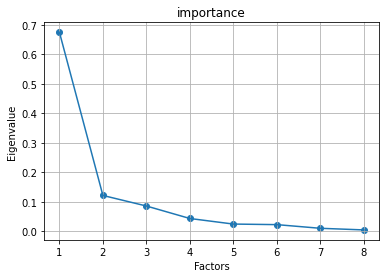

Numbers of components: 8
PCA components shape: (8, 78)


In [9]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1, len(importance)+1),importance)
plt.plot(range(1, len(importance)+1),importance)
plt.title('importance')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

print("Numbers of components: {}".format(pca.n_components_))
print("PCA components shape:", (pca.components_).shape)

In [10]:
explained_variance_need = np.array([pca.explained_variance_])
component_need = np.array(pca.components_)
print("explained_variance_need shape: ", explained_variance_need.shape)
print("component_need shape: ", component_need.shape)
column_names = list(total_data)
weights = np.divide(np.dot(explained_variance_need, component_need), np.sum(component_need, axis = 0), out = np.zeros_like(np.dot(explained_variance_need, component_need)), where=np.sum(component_need, axis = 0)!=0)
weights = weights/np.sum(weights)
df_weights = pd.DataFrame({"columns": column_names[:-1], "weights": weights[0].tolist()})
df_weights.sort_values(by="weights", ascending=False)

explained_variance_need shape:  (1, 8)
component_need shape:  (8, 78)


,columns,weights
76,Idle Max,0.754716
70,Active Mean,0.133790
6,Fwd Packet Length Max,0.127467
8,Fwd Packet Length Mean,0.068431
9,Fwd Packet Length Std,0.066173
...,...,...
18,Flow IAT Max,-0.034827
20,Fwd IAT Total,-0.036559
27,Bwd IAT Std,-0.062541
63,Subflow Fwd Bytes,-0.076132


## Benign 1

In [11]:
pca_benign1 = PCA(n_components = 0.99)
benign1_pca = pca_benign1.fit_transform(Benign1_data.iloc[:,:-1])
print("benign1_pca shape: ", benign1_pca.shape)

benign1_pca shape:  (1000000, 9)


In [12]:
Benign1_pcaDf = pd.DataFrame(data = benign1_pca, columns = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'])
Benign1_pcaDf = Benign1_pcaDf.reset_index(drop = True)
Benign1_data = Benign1_data.reset_index(drop = True)
Benign1_pcaDf = pd.concat([Benign1_pcaDf, Benign1_data.iloc[:,-1]], axis = 1)
Benign1_pcaDf.to_csv("Benign1.csv", index=False)
Benign1_pcaDf.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,Label
0,-2.103863e+07,-2.030259e+06,713941.583554,-37705.071773,-194053.785881,-564032.444881,-182546.865126,-84080.891354,29664.865497,BENIGN
1,-2.104494e+07,-2.030427e+06,704433.837759,-37661.939616,-199771.545631,-572528.914882,-188728.765928,-86871.667107,29028.975645,BENIGN
2,-2.092347e+07,-2.026709e+06,704554.780180,-37733.298280,-212308.992651,-454277.204405,-208997.216382,-20125.942858,39739.401674,BENIGN
3,-2.104568e+07,-1.976874e+06,703907.622315,-37639.244956,-199762.612548,-572386.573040,-188714.262769,-86843.890280,29060.379360,BENIGN
4,-2.107673e+07,1.655860e+05,682850.429258,-37483.368092,-198610.865382,-569507.333136,-187838.273051,-86387.507809,28778.016510,BENIGN


In [13]:
explained_variance_benign1 = np.array([pca_benign1.explained_variance_])
component_benign1 = np.array(pca_benign1.components_)
print("explained_variance shape: ", explained_variance_benign1.shape)
print("component shape: ", component_benign1.shape)
a, b = np.dot(explained_variance_benign1, component_benign1), np.sum(component_benign1, axis = 0)
benign1_weights = np.divide(a, b, out = np.zeros_like(a), where=b!=0)
benign1_weights = benign1_weights/np.sum(benign1_weights)
df_weights_benign1 = pd.DataFrame({"columns": column_names[:-1], "weights": benign1_weights[0].tolist()})
df_weights_benign1.sort_values(by="weights", ascending=False)

explained_variance shape:  (1, 9)
component shape:  (9, 78)


,columns,weights
25,Bwd IAT Total,0.944998
46,PSH Flag Count,0.487371
20,Fwd IAT Total,0.290969
77,Idle Min,0.051402
71,Active Std,0.036832
...,...,...
76,Idle Max,-0.037348
1,Flow Duration,-0.059067
24,Fwd IAT Min,-0.066945
17,Flow IAT Std,-0.094628


## Benign 2

In [14]:
pca_benign2 = PCA(n_components = 0.99)
benign2_pca = pca_benign2.fit_transform(Benign2_data.iloc[:,:-1])
print("benign2_pca shape: ", benign2_pca.shape)

benign2_pca shape:  (817082, 9)


In [15]:
Benign2_pcaDf = pd.DataFrame(data = benign2_pca, columns = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'])
Benign2_pcaDf = Benign2_pcaDf.reset_index(drop = True)
Benign2_data = Benign2_data.reset_index(drop = True)
Benign2_pcaDf = pd.concat([Benign2_pcaDf, Benign2_data.iloc[:,-1]], axis = 1)
Benign2_pcaDf.to_csv("Benign2.csv", index=False)
Benign2_pcaDf.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,Label
0,-2.097053e+07,-7.032615e+05,6.783848e+05,-13293.925133,-2.086239e+05,-5.623699e+05,-192823.581595,-79549.989133,24921.655922,BENIGN
1,-2.097629e+07,-3.344715e+05,6.754317e+05,-13244.611755,-2.083752e+05,-5.622278e+05,-192672.226018,-79726.876752,24910.029304,BENIGN
2,4.489510e+07,-7.402591e+05,4.113452e+07,-137381.172299,-1.843834e+07,-2.901615e+06,-795464.589794,-118617.151068,-349277.305510,BENIGN
3,-2.093291e+07,-2.038967e+06,6.911161e+05,-13119.784377,-2.126758e+05,-5.441321e+05,-199444.448569,-66031.942802,29843.037235,BENIGN
4,-2.093318e+07,-2.042046e+06,6.911053e+05,-13155.568284,-2.126308e+05,-5.444799e+05,-199351.002398,-66273.750680,29761.061267,BENIGN


In [17]:
explained_variance_benign2 = np.array([pca_benign2.explained_variance_])
component_benign2 = np.array(pca_benign2.components_)
print("explained_variance shape: ", explained_variance_benign2.shape)
print("component shape: ", component_benign2.shape)
a, b = np.dot(explained_variance_benign2, component_benign2), np.sum(component_benign2, axis = 0)
benign2_weights = np.divide(a, b, out = np.zeros_like(a), where=b!=0)
benign2_weights = benign2_weights/np.sum(benign2_weights)
df_weights_benign2 = pd.DataFrame({"columns": column_names[:-1], "weights": benign2_weights[0].tolist()})
df_weights_benign2.sort_values(by="weights", ascending=False)

explained_variance shape:  (1, 9)
component shape:  (9, 78)


,columns,weights
25,Bwd IAT Total,1.275432
20,Fwd IAT Total,0.463514
46,PSH Flag Count,0.336485
71,Active Std,0.118622
77,Idle Min,0.089381
...,...,...
76,Idle Max,-0.060654
1,Flow Duration,-0.093269
24,Fwd IAT Min,-0.093696
17,Flow IAT Std,-0.173555


## Benign 3

In [21]:
pca_benign3 = PCA(n_components = 0.99)
benign3_pca = pca_benign3.fit_transform(Benign3_data.iloc[:,:-1])
print("benign3_pca shape: ", benign3_pca.shape)

In [18]:
Benign3_pcaDf = pd.DataFrame(data = benign3_pca, columns = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6'])
Benign3_pcaDf = Benign3_pcaDf.reset_index(drop = True)
Benign3_data = total_data.reset_index(drop = True)
Benign3_pcaDf = pd.concat([Benign3_pcaDf, Benign3_data.iloc[:,-1]], axis = 1)
Benign3_pcaDf.head()

,c1,c2,c3,c4,c5,c6,Label
0,-226448.151695,-2.065058e+07,698004.896857,-1.628699e+06,-116857.288815,-648316.986891,BENIGN
1,-226408.924631,-2.064871e+07,697571.694698,-1.641172e+06,-116590.173346,-645205.695534,BENIGN
2,-226408.972946,-2.064872e+07,697572.369547,-1.641138e+06,-116590.653965,-645223.794438,BENIGN
3,-226408.957082,-2.064872e+07,697572.965777,-1.641152e+06,-116590.998895,-645215.019774,BENIGN
4,-226439.049981,-2.064909e+07,697647.909905,-1.638824e+06,-116643.063380,-645793.495878,BENIGN


In [19]:
explained_variance_benign3 = np.array([pca_benign3.explained_variance_])
component_benign3 = np.array(pca_benign3.components_)
print("explained_variance shape: ", explained_variance_benign3.shape)
print("component shape: ", component_benign3.shape)
a, b = np.dot(explained_variance_benign3, component_benign3), np.sum(component_benign3, axis = 0)
benign3_weights = np.divide(a, b, out = np.zeros_like(a), where=b!=0)
benign3_weights = benign3_weights/np.sum(benign3_weights)
df_weights_benign3 = pd.DataFrame({"columns": column_names[:-1], "weights": benign3_weights[0].tolist()})
df_weights_benign3.sort_values(by="weights", ascending=False)

explained_variance shape:  (1, 6)
component shape:  (6, 78)


,columns,weights
24,Fwd IAT Min,0.321936
34,Fwd Header Length,0.056104
55,Fwd Header Length.1,0.056104
69,min_seg_size_forward,0.049321
1,Flow Duration,0.038298
...,...,...
47,ACK Flag Count,-0.009807
67,Init_Win_bytes_backward,-0.010732
29,Bwd IAT Min,-0.013665
26,Bwd IAT Mean,-0.022117


## Benign 4

In [20]:
pca_benign4 = PCA(n_components = 0.99)
benign4_pca = pca_benign4.fit_transform(Benign4_data.iloc[:,:-1])
print("benign4_pca shape: ", benign4_pca.shape)

benign4_pca shape:  (439683, 6)


In [21]:
Benign4_pcaDf = pd.DataFrame(data = benign4_pca, columns = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6'])
Benign4_pcaDf = Benign4_pcaDf.reset_index(drop = True)
Benign4_data = Benign4_data.reset_index(drop = True)
Benign4_pcaDf = pd.concat([Benign4_pcaDf, Benign4_data.iloc[:,-1]], axis = 1)
Benign4_pcaDf.head()

,c1,c2,c3,c4,c5,c6,Label
0,-2.282009e+07,-1.493707e+07,1.090717e+06,-1785.210694,-668488.432238,-176718.649629,BENIGN
1,-2.282009e+07,-1.493707e+07,1.090712e+06,-1789.422242,-668458.898839,-176728.144027,BENIGN
2,-2.282009e+07,-1.493707e+07,1.090716e+06,-1786.286485,-668481.064734,-176721.283356,BENIGN
3,-2.282009e+07,-1.493707e+07,1.090717e+06,-1785.210999,-668488.495882,-176718.728681,BENIGN
4,-2.282009e+07,-1.493707e+07,1.090717e+06,-1785.265872,-668488.579513,-176718.725400,BENIGN


In [22]:
explained_variance_benign4 = np.array([pca_benign4.explained_variance_])
component_benign4 = np.array(pca_benign4.components_)
print("explained_variance shape: ", explained_variance_benign4.shape)
print("component shape: ", component_benign4.shape)
a, b = np.dot(explained_variance_benign4, component_benign4), np.sum(component_benign4, axis = 0)
benign4_weights = np.divide(a, b, out = np.zeros_like(a), where=b!=0)
benign4_weights = benign4_weights/np.sum(benign4_weights)
df_weights_benign4 = pd.DataFrame({"columns": column_names[:-1], "weights": benign4_weights[0].tolist()})
df_weights_benign4.sort_values(by="weights", ascending=False)

explained_variance shape:  (1, 6)
component shape:  (6, 78)


,columns,weights
27,Bwd IAT Std,0.872673
74,Idle Mean,0.761269
25,Bwd IAT Total,0.449584
8,Fwd Packet Length Mean,0.229281
53,Avg Fwd Segment Size,0.229281
...,...,...
46,PSH Flag Count,-0.179427
1,Flow Duration,-0.220299
20,Fwd IAT Total,-0.224410
76,Idle Max,-0.354843


## Botnet

In [18]:
pca_Botnet = PCA(n_components = 0.99)
Botnet_pca = pca_Botnet.fit_transform(Botnet_data.iloc[:,:-1])
print("Botnet_pca shape: ", Botnet_pca.shape)

Botnet_pca shape:  (10001, 4)


In [19]:
Botnet_pcaDf = pd.DataFrame(data = Botnet_pca, columns = ['c1', 'c2', 'c3', 'c4'])
Botnet_pcaDf = Botnet_pcaDf.reset_index(drop = True)
Botnet_data = Botnet_data.reset_index(drop = True)
Botnet_pcaDf = pd.concat([Botnet_pcaDf, Botnet_data.iloc[:,-1]], axis = 1)
Botnet_pcaDf.to_csv("BotnetARES.csv", index=False)
Botnet_pcaDf.head()

,c1,c2,c3,c4,Label
0,-67301.981110,-390753.110271,-410161.587932,233653.076479,BotnetARES
1,-586122.931447,-612840.651456,-197852.497409,339255.127006,BotnetARES
2,-374972.248706,-540843.987967,-445086.501069,327780.030644,BotnetARES
3,-557009.343184,-619293.137343,-344280.315974,359608.092420,BotnetARES
4,-414104.481265,-559909.097949,-448598.813094,339654.450549,BotnetARES


In [20]:
explained_variance_Botnet = np.array([pca_Botnet.explained_variance_])
component_Botnet = np.array(pca_Botnet.components_)
print("explained_variance shape: ", explained_variance_Botnet.shape)
print("component shape: ", component_Botnet.shape)
a, b = np.dot(explained_variance_Botnet, component_Botnet), np.sum(component_Botnet, axis = 0)
Botnet_weights = np.divide(a, b, out = np.zeros_like(a), where=b!=0)
Botnet_weights = Botnet_weights/np.sum(Botnet_weights)
df_weights_Botnet = pd.DataFrame({"columns": column_names[:-1], "weights": Botnet_weights[0].tolist()})
df_weights_Botnet.sort_values(by="weights", ascending=False)

explained_variance shape:  (1, 4)
component shape:  (4, 78)


,columns,weights
62,Subflow Fwd Packets,0.513009
2,Total Fwd Packets,0.513009
28,Bwd IAT Max,0.005412
23,Fwd IAT Max,0.005332
18,Flow IAT Max,0.005224
...,...,...
63,Subflow Fwd Bytes,-0.002445
42,Packet Length Variance,-0.002566
35,Bwd Header Length,-0.005313
64,Subflow Bwd Packets,-0.006807


## Brute

In [21]:
pca_Brute = PCA(n_components = 0.99)
Brute_pca = pca_Brute.fit_transform(Brute_data.iloc[:,:-1])
print("Brute_pca shape: ", Brute_pca.shape)

Brute_pca shape:  (11065, 3)


In [22]:
Brute_pcaDf = pd.DataFrame(data = Brute_pca, columns = ['c1', 'c2', 'c3'])
Brute_pcaDf = Brute_pcaDf.reset_index(drop = True)
Brute_data = Brute_data.reset_index(drop = True)
Brute_pcaDf = pd.concat([Brute_pcaDf, Brute_data.iloc[:,-1]], axis = 1)
Brute_pcaDf.to_csv("BruteForce.csv", index=False)
Brute_pcaDf.head()

,c1,c2,c3,Label
0,-8.797923e+06,-1.215546e+04,-872827.206350,BruteForce
1,7.311466e+06,1.490834e+06,-111062.737867,BruteForce
2,7.166292e+06,1.361643e+06,-112560.084829,BruteForce
3,-8.797857e+06,-1.212947e+04,-873830.237082,BruteForce
4,7.102066e+06,1.515776e+06,-107266.586933,BruteForce


In [23]:
explained_variance_Brute = np.array([pca_Botnet.explained_variance_])
component_Botnet = np.array(pca_Botnet.components_)
print("explained_variance shape: ", explained_variance_Botnet.shape)
print("component shape: ", component_Botnet.shape)
a, b = np.dot(explained_variance_Botnet, component_Botnet), np.sum(component_Botnet, axis = 0)
Botnet_weights = np.divide(a, b, out = np.zeros_like(a), where=b!=0)
Botnet_weights = Botnet_weights/np.sum(Botnet_weights)
df_weights_Botnet = pd.DataFrame({"columns": column_names[:-1], "weights": Botnet_weights[0].tolist()})
df_weights_Botnet.sort_values(by="weights", ascending=False)

explained_variance shape:  (1, 4)
component shape:  (4, 78)


,columns,weights
62,Subflow Fwd Packets,0.513009
2,Total Fwd Packets,0.513009
28,Bwd IAT Max,0.005412
23,Fwd IAT Max,0.005332
18,Flow IAT Max,0.005224
...,...,...
63,Subflow Fwd Bytes,-0.002445
42,Packet Length Variance,-0.002566
35,Bwd Header Length,-0.005313
64,Subflow Bwd Packets,-0.006807


## Dos

In [24]:
pca_Dos = PCA(n_components = 0.99)
Dos_pca = pca_Dos.fit_transform(Dos_data.iloc[:,:-1])
print("Dos_pca shape: ", Dos_pca.shape)

Dos_pca shape:  (303800, 6)


In [25]:
Dos_pcaDf = pd.DataFrame(data = Dos_pca, columns = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6'])
Dos_pcaDf = Dos_pcaDf.reset_index(drop = True)
Dos_data = Dos_data.reset_index(drop = True)
Dos_pcaDf = pd.concat([Dos_pcaDf, Dos_data.iloc[:,-1]], axis = 1)
Dos_pcaDf.to_csv("Dos.csv", index=False)
Dos_pcaDf.head()

,c1,c2,c3,c4,c5,c6,Label
0,-8.490714e+07,-2.240049e+06,2.331134e+06,-519103.267610,-7.236341e+06,2.727401e+06,DoS
1,-9.143866e+07,-6.762134e+05,7.763916e+05,-551708.767752,-5.338267e+06,1.914664e+06,DoS
2,1.393877e+08,8.046512e+07,-8.093673e+05,-52609.193430,-7.189467e+06,-3.523135e+06,DoS
3,1.833099e+08,9.551309e+07,-4.222273e+05,47664.381635,-8.618253e+06,-4.531643e+06,DoS
4,-1.100080e+08,3.845791e+06,-3.377108e+06,-662850.718206,-3.130549e+05,-6.975213e+05,DoS


In [26]:
explained_variance_Dos = np.array([pca_Dos.explained_variance_])
component_Dos = np.array(pca_Dos.components_)
print("explained_variance shape: ", explained_variance_Dos.shape)
print("component shape: ", component_Dos.shape)
a, b = np.dot(explained_variance_Dos, component_Dos), np.sum(component_Dos, axis = 0)
Dos_weights = np.divide(a, b, out = np.zeros_like(a), where=b!=0)
Dos_weights = Dos_weights/np.sum(Dos_weights)
df_weights_Dos = pd.DataFrame({"columns": column_names[:-1], "weights": Dos_weights[0].tolist()})
df_weights_Dos.sort_values(by="weights", ascending=False)

explained_variance shape:  (1, 6)
component shape:  (6, 78)


,columns,weights
74,Idle Mean,4.387324
6,Fwd Packet Length Max,0.480908
22,Fwd IAT Std,0.467143
3,Total Backward Packets,0.308302
2,Total Fwd Packets,0.271313
...,...,...
43,FIN Flag Count,-0.602466
1,Flow Duration,-0.779974
55,Fwd Header Length.1,-0.860061
34,Fwd Header Length,-0.860061


## Infiltration

In [27]:
pca_Infil = PCA(n_components = 0.99)
Infil_pca = pca_Infil.fit_transform(Infil_data.iloc[:,:-1])
print("Infil_pca shape: ", Infil_pca.shape)

Infil_pca shape:  (500, 4)


In [29]:
Infil_pcaDf = pd.DataFrame(data = Infil_pca, columns = ['c1', 'c2', 'c3', 'c4'])
Infil_pcaDf = Infil_pcaDf.reset_index(drop = True)
Infil_data = Infil_data.reset_index(drop = True)
Infil_pcaDf = pd.concat([Infil_pcaDf, Infil_data.iloc[:,-1]], axis = 1)
Infil_pcaDf.to_csv("Infilliation.csv", index=False)
Infil_pcaDf.head()

,c1,c2,c3,c4,Label
0,-5.230781e+06,5.808195e+07,1.803843e+06,-2.328285e+06,Infiltration
1,9.451698e+07,9.998997e+06,6.420619e+07,4.434265e+07,Infiltration
2,-7.413475e+07,-4.410628e+07,-2.198366e+06,-2.310648e+06,Infiltration
3,-1.839134e+07,7.182491e+07,4.489153e+07,-4.831713e+06,Infiltration
4,-5.435792e+07,1.681731e+07,-5.160424e+06,4.128819e+07,Infiltration


In [30]:
explained_variance_Infil = np.array([pca_Infil.explained_variance_])
component_Infil = np.array(pca_Infil.components_)
print("explained_variance shape: ", explained_variance_Infil.shape)
print("component shape: ", component_Infil.shape)
a, b = np.dot(explained_variance_Infil, component_Infil), np.sum(component_Infil, axis = 0)
Infil_weights = np.divide(a, b, out = np.zeros_like(a), where=b!=0)
Infil_weights = Infil_weights/np.sum(Infil_weights)
df_weights_Infil = pd.DataFrame({"columns": column_names[:-1], "weights": Infil_weights[0].tolist()})
df_weights_Infil.sort_values(by="weights", ascending=False)

explained_variance shape:  (1, 4)
component shape:  (4, 78)


,columns,weights
8,Fwd Packet Length Mean,0.247089
53,Avg Fwd Segment Size,0.247089
20,Fwd IAT Total,0.154998
52,Average Packet Size,0.090550
40,Packet Length Mean,0.078386
...,...,...
26,Bwd IAT Mean,-0.006404
27,Bwd IAT Std,-0.012146
75,Idle Std,-0.016227
14,Flow Bytes/s,-0.061471


## Web

In [31]:
pca_Web = PCA(n_components = 0.99)
Web_pca = pca_Web.fit_transform(Web_data.iloc[:,:-1])
print("Web_pca shape: ", Web_pca.shape)

Web_pca shape:  (10000, 3)


In [32]:
Web_pcaDf = pd.DataFrame(data = Web_pca, columns = ['c1', 'c2', 'c3'])
Web_pcaDf = Web_pcaDf.reset_index(drop = True)
Web_data = Web_data.reset_index(drop = True)
Web_pcaDf = pd.concat([Web_pcaDf, Web_data.iloc[:,-1]], axis = 1)
Web_pcaDf.to_csv("WebAttack.csv", index=False)
Web_pcaDf.head()

,c1,c2,c3,Label
0,7.261192e+06,-6.390392e+06,293749.387162,WebAttack
1,7.202833e+06,-6.345567e+06,294226.573172,WebAttack
2,6.154330e+06,-5.539887e+06,302933.869278,WebAttack
3,6.846834e+06,-6.071950e+06,297207.180445,WebAttack
4,6.300954e+06,-5.652354e+06,301792.050661,WebAttack


In [33]:
explained_variance_Web = np.array([pca_Web.explained_variance_])
component_Web = np.array(pca_Web.components_)
print("explained_variance shape: ", explained_variance_Web.shape)
print("component shape: ", component_Web.shape)
a, b = np.dot(explained_variance_Web, component_Web), np.sum(component_Web, axis = 0)
Web_weights = np.divide(a, b, out = np.zeros_like(a), where=b!=0)
Web_weights = Web_weights/np.sum(Web_weights)
df_weights_Web = pd.DataFrame({"columns": column_names[:-1], "weights": Web_weights[0].tolist()})
df_weights_Web.sort_values(by="weights", ascending=False)

explained_variance shape:  (1, 3)
component shape:  (3, 78)


,columns,weights
51,Down/Up Ratio,0.844587
1,Flow Duration,0.240978
14,Flow Bytes/s,0.171043
25,Bwd IAT Total,0.165353
20,Fwd IAT Total,0.125554
...,...,...
19,Flow IAT Min,-0.112920
24,Fwd IAT Min,-0.122232
40,Packet Length Mean,-0.126748
12,Bwd Packet Length Mean,-0.206156


## Port

In [34]:
pca_Port = PCA(n_components = 0.999)
Port_pca = pca_Port.fit_transform(Port_data.iloc[:,:-1])
print("Port_pca shape: ", Port_pca.shape)

Port_pca shape:  (127043, 4)


In [35]:
Port_pcaDf = pd.DataFrame(data = Port_pca, columns = ['c1', 'c2', 'c3','c4'])
Port_pcaDf = Port_pcaDf.reset_index(drop = True)
Port_data = Port_data.reset_index(drop = True)
Port_pcaDf = pd.concat([Port_pcaDf, Port_data.iloc[:,-1]], axis = 1)
Port_pcaDf.to_csv("PortScan.csv", index=False)
Port_pcaDf.head()

,c1,c2,c3,c4,Label
0,-279200.325650,-15679.665744,1.058547e+06,-2543.374373,PortScan
1,-278216.292547,-5596.148129,9.997282e+04,-3338.677239,PortScan
2,-278138.669320,-4794.453224,2.404562e+04,-3483.488660,PortScan
3,-278057.878714,-4067.308008,-4.446835e+04,-3529.452401,PortScan
4,-278013.276040,-3608.188555,-8.763401e+04,-3581.831975,PortScan


In [36]:
explained_variance_Port = np.array([pca_Port.explained_variance_])
component_Port = np.array(pca_Port.components_)
print("explained_variance shape: ", explained_variance_Port.shape)
print("component shape: ", component_Port.shape)
a, b = np.dot(explained_variance_Port, component_Port), np.sum(component_Port, axis = 0)
Port_weights = np.divide(a, b, out = np.zeros_like(a), where=b!=0)
Port_weights = Port_weights/np.sum(Web_weights)
df_weights_Port = pd.DataFrame({"columns": column_names[:-1], "weights": Port_weights[0].tolist()})
df_weights_Port.sort_values(by="weights", ascending=False)

explained_variance shape:  (1, 4)
component shape:  (4, 78)


,columns,weights
16,Flow IAT Mean,2.456743e+14
17,Flow IAT Std,1.058373e+14
28,Bwd IAT Max,5.070415e+13
25,Bwd IAT Total,4.779517e+13
77,Idle Min,4.560147e+13
...,...,...
38,Min Packet Length,-7.350041e+12
24,Fwd IAT Min,-4.659496e+13
29,Bwd IAT Min,-5.740202e+13
26,Bwd IAT Mean,-1.722880e+14


# LDA

In [38]:
np.unique(total_data.iloc[:,-1])

array(['BENIGN', 'BotnetARES', 'BruteForce', 'DoS', 'Infiltration',
       'WebAttack'], dtype=object)

In [39]:
# LDA: Number of components (<= min(n_classes - 1, n_features))
lda = LDA(n_components = 4)
data_lda = lda.fit_transform(total_data.iloc[:,:-1], total_data.iloc[:,-1])
data_lda.shape

(2669106, 4)

In [40]:
total_df = pd.DataFrame(data = data_lda, columns = ['c1', 'c2', 'c3', 'c4'])
total_df = total_df.reset_index(drop = True)
total_data = total_data.reset_index(drop = True)
total_df = pd.concat([total_df, total_data.iloc[:,-1]], axis = 1)
total_df.head()

,c1,c2,c3,c4,Label
0,-0.041275,1.714367,0.150859,2.470554,BENIGN
1,2.569671,1.286272,0.024140,2.262073,BENIGN
2,2.569639,1.286258,0.024141,2.262097,BENIGN
3,2.569565,1.285715,0.024301,2.257831,BENIGN
4,2.556535,1.206449,0.047401,1.644348,BENIGN


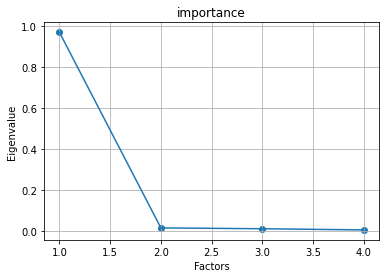

In [41]:
importance = lda.explained_variance_ratio_
plt.scatter(range(1, len(importance)+1),importance)
plt.plot(range(1, len(importance)+1),importance)
plt.title('importance')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()